In [11]:
def lt(a):
    list.append(a)
    

In [13]:
lt(3)
list

[3]

In [12]:
list = []


In [19]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
import pandas as pd
pd.set_option('display.max.colwidth', 130)

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
fm._rebuild() 
%matplotlib inline

!apt -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)


import feedparser
from bs4 import BeautifulSoup as bs
import urllib
import urllib.request as req
import requests

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

from konlpy.tag import Kkma, Okt, Komoran
okt = Okt()
from konlpy.utils import pprint

from collections import Counter

import datetime
from datetime import timedelta

In [21]:
import re

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


from gensim.models import Word2Vec


# 그래프에서 한글표현을 위해 폰트를 설치합니다.
# %config InlineBackend.figure_format = 'retina'

from plotnine import *
import plotnine

import warnings
warnings.filterwarnings("ignore")


remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error downloading 'wordnet' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/wordnet.zip>:   HTTP Error 500:
[nltk_data]     Internal Server Error


In [22]:
def next_ds(de):
    converted_de = datetime.datetime.strptime(de, '%Y.%m.%d').date()   # de를 datetime 형식으로 변환
    next_day = converted_de + timedelta(days=1)  # 1일 뒤 날짜 구함
    ds = next_day.strftime('%Y.%m.%d')
    return ds

In [55]:
p_ds = '2020.06.03'
p_de = '2020.06.07'
cvt_ds = datetime.datetime.strptime(p_ds, '%Y.%m.%d').date()
cvt_de = datetime.datetime.strptime(p_de, '%Y.%m.%d').date()
periods = (cvt_de - cvt_de).days
print(periods)

0


In [62]:
day_list = []
CumNum_list = []

def get_OnlyNewsNum(keyword, p_ds, p_de):
    keyword = '+'.join(keyword.split(' '))

    last = False
    page_num = 1

    cvt_ds = datetime.datetime.strptime(p_ds, '%Y.%m.%d').date()
    cvt_de = datetime.datetime.strptime(p_de, '%Y.%m.%d').date()
    periods = (cvt_de - cvt_ds).days
    ds = p_ds

    for period in range(periods + 1):
        de = ds
        Cum_li = 0 # 페이지별 기사 수 누적 (relation list 포함됨)
        while last == False:
            url = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}&de={2}&docid=&nso=so:r,p:,a:all&mynews=1&cluster_rank=238&start={3}&refresh_start=0".format(keyword,ds,de,str(page_num))
            raw = requests.get(url)
            html = raw.content
            soup = bs(html, 'html.parser')

            page = soup.find('div', {'class':'paging'})
            page_a_list = page.findAll('a')

            ul = soup.find('ul', {'class':'type01'})
            li_list = ul.findAll('li')

            if '다음페이지' in str(page_a_list[-1]):
                Cum_li += len(li_list)  # relation 기사 포함된 li_list 길이 누적시킴
                page_num += 10
                
            else:
                Cum_li += len(li_list)
                CumNum_list.append(Cum_li)
                page_num = 1
                last = True

        day_list.append(ds)
        ds = next_ds(de)
        last=False

In [72]:
get_OnlyNewsNum('춘천', '2020.01.01', '2020.04.30')

KeyboardInterrupt: ignored

In [64]:
cum_dict = {'day' : day_list,
            'CumNum' : CumNum_list}
            
CumNews_df = pd.DataFrame(cum_dict)
CumNews_df

,day,CumNum
0,2020.06.01,563
1,2020.06.02,560
2,2020.06.03,848
3,2020.06.04,694
4,2020.06.05,687
5,2020.06.06,172
6,2020.06.07,156
7,2020.06.08,827
8,2020.06.09,633
9,2020.06.10,902


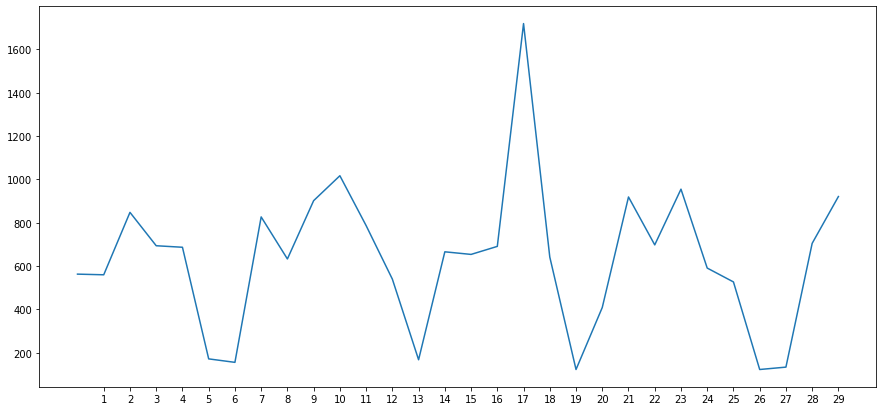

In [69]:
plt.figure(figsize=(15,7))
plt.plot(CumNews_df['CumNum'])
plt.xticks(np.arange(1,30))
plt.show()